# <p style="text-align: center;">ARIMA model implementation</p>

In [230]:
from statsmodels.graphics.tsaplots import plot_acf
import yfinance as yf
import pandas as pd
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

#### **1) Download the data**

I will try to predict Bitcoin price useing ARIMA model

In [231]:
import yfinance as yf
import pandas as pd
data = yf.Ticker("BTC-USD")
data = data.history(start="2023-01-01",  end='2023-12-27')

Now lets delete extra columns

In [232]:
data.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'],inplace=True)
data.index=data.index.strftime('%d-%m-%y')
data.head()

,Close
Date,
01-01-23,16625.080078
02-01-23,16688.470703
03-01-23,16679.857422
04-01-23,16863.238281
05-01-23,16836.736328


**2) Visualizing**

In [233]:
import matplotlib.pyplot as plt

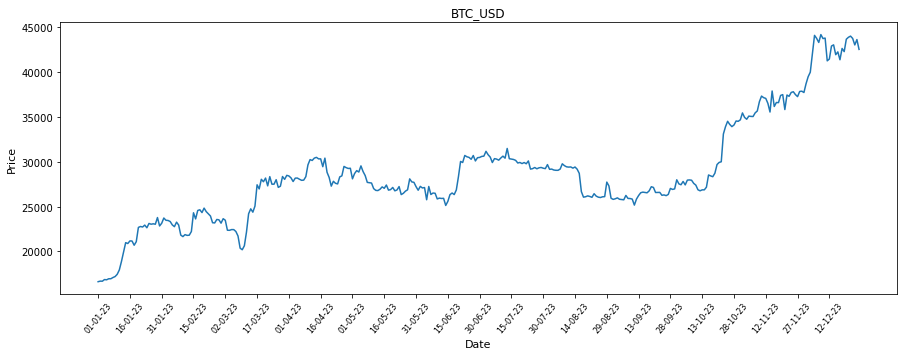

In [234]:
plt.figure(figsize=(15, 5))
plt.plot(data.index, data['Close'])
plt.title('BTC_USD')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Price', fontsize=11)
plt.xticks(data.index[::15],rotation=50,fontsize = 8);

Now we need to investigate the stationarity and determine the parameters of the model !

First, lets look at ACF and PACF of the series...

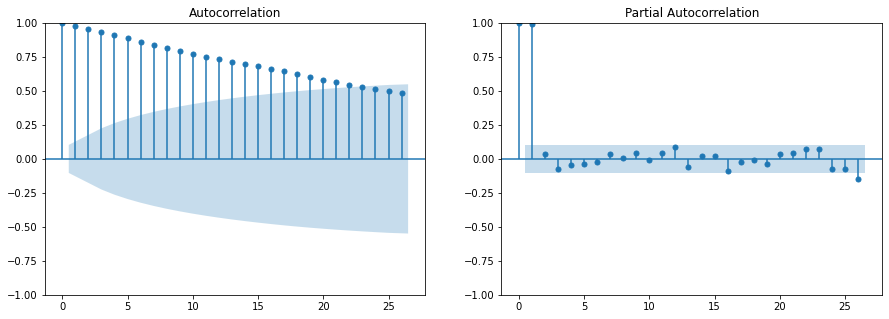

In [235]:
#ACF,PACF for initial data

f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
plot_acf(data['Close'], ax=ax1)
ax2 = f.add_subplot(122)
plot_pacf(data['Close'],method = "ols",ax=ax2)
plt.show();

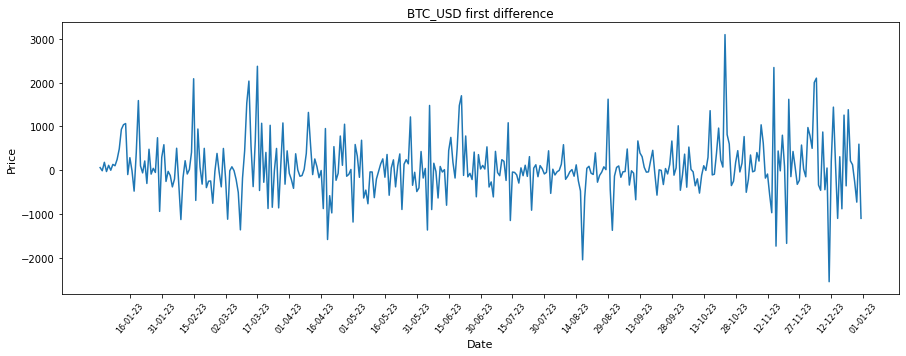

In [236]:
plt.figure(figsize=(15, 5))
plt.plot(data.index[1:], data['Close'].diff()[1:])
plt.title('BTC_USD first difference')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Price', fontsize=11)
plt.xticks(data.index[::15],rotation=50,fontsize = 8);

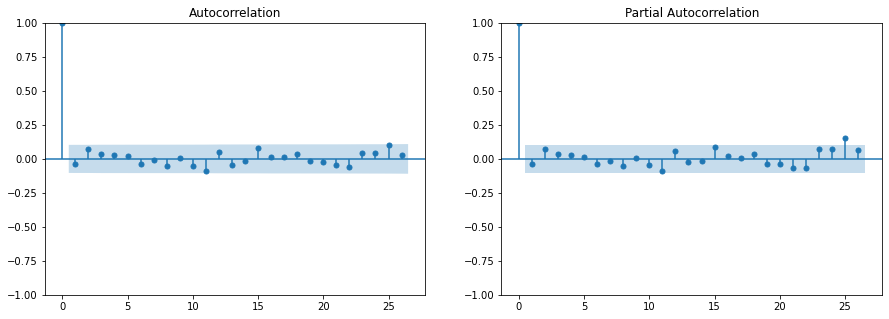

In [237]:
#ACF,PACF for the first differences

f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
plot_acf(data['Close'].diff()[1:], ax=ax1)
ax2 = f.add_subplot(122)
plot_pacf(data['Close'].diff()[1:],method = "ols",ax=ax2)
plt.show();

So as we can see after makin first differences our TS becomes white noise ...

We can also make a more formal check using Augmented Dickey-Fuller Test

In [238]:
result = adfuller(data['Close'])
print('p-value for initial ts: ', result[1])
result = adfuller(data['Close'].diff()[1:])
print('p-value for the first difference ts: ', result[1])
result = adfuller(data['Close'].diff().diff()[2:])
print('p-value for the second difference ts: ', result[1])

p-value for initial ts:  0.8315066066429043
p-value for the first difference ts:  0.0
p-value for the second difference ts:  2.1125199392106226e-14


When p-val is less then confidence value (say 0.05) we can reject our null hypothesis (non-statinary ts)  
So, the ts becomes stationary after making first difference (second as well)  
Finally, appropriate structure is ARIMA(0,1,0) which means that ts is random wall => we can try to fit the model and make a predictions but obviosly we will just get the previous value as a prediction ( I(1) is all about this )